In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar
!pip install highlight_text==0.0.5
import highlight_text
from functools import reduce

from MSGPCA import MSGPCA # MSGPCA(DATA, NCOMPONENTS)

You should consider upgrading via the 'd:\python kurulum\python.exe -m pip install --upgrade pip' command.


In [2]:
# PLAYER, POSITION, SEASON and COLOR Selection ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Player_1 = 'Patrick van Aanholt_Crystal Palace_2020 - 2021'
Player_2 = 'Ezgjan Alioski_Leeds United_2020 - 2021'
Competition = 'EPL'
Color_1 = 'dodgerblue'
Color_2 = 'white'
Season = '2020 - 2021'
#Position = 'DF'  # can be GK, DF, DFMF, DFFW, MFDF, MF, MFFW, FWDF, FWMF, FW, Blank - if multiple poisitons are to be selected select them manually in the filters section below

In [3]:
# How to Use --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1) PLAYER, POSITION, SEASON and COLOR Selection
# 2) FILTERS
# 3) METRICS
# 4) PARAMETERS

In [4]:
myfont = {'fontname':'DejaVu Sans'}

In [5]:
filenames = ['0-Standard.txt','1-Goalkeeping.txt','2-Advanced Goalkeeping.txt','3-Shooting.txt', '4-Passing.txt', '5-Pass Types.txt', '6-Goal and Shot Creation.txt', '7-Defensive Actions.txt', '8-Possession.txt', '9-Playing Time.txt', '10-Miscellaneous Stats.txt']

In [6]:
dataframe_list = [pd.read_csv(file_name) for file_name in filenames]

In [7]:
df0 = dataframe_list[0]
df0['Player_ID'] = df0['Player'].astype(str) + df0['Squad'].astype(str) # Workaround to correct duplicate GK stats
df1 = dataframe_list[1]
df1['Player_ID'] = df1['Player'].astype(str) + df1['Squad'].astype(str)
df2 = dataframe_list[2]
df2['Player_ID'] = df2['Player'].astype(str) + df2['Squad'].astype(str)
df3 = dataframe_list[3]
df3['Player_ID'] = df3['Player'].astype(str) + df3['Squad'].astype(str)
df4 = dataframe_list[4]
df4['Player_ID'] = df4['Player'].astype(str) + df4['Squad'].astype(str)
df5 = dataframe_list[5]
df5['Player_ID'] = df5['Player'].astype(str) + df5['Squad'].astype(str)
df6 = dataframe_list[6]
df6['Player_ID'] = df6['Player'].astype(str) + df6['Squad'].astype(str)
df7 = dataframe_list[7]
df7['Player_ID'] = df7['Player'].astype(str) + df7['Squad'].astype(str)
df8 = dataframe_list[8]
df8['Player_ID'] = df8['Player'].astype(str) + df8['Squad'].astype(str)
df9 = dataframe_list[9]
df9['Player_ID'] = df9['Player'].astype(str) + df9['Squad'].astype(str)
df10 = dataframe_list[10]
df10['Player_ID'] = df10['Player'].astype(str) + df10['Squad'].astype(str)

In [8]:
dataframes = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10] # to join 

In [9]:
df = reduce(lambda left,right: pd.merge(left,right,on=['Player','Player_ID'], how='outer'), dataframes)

In [10]:
df = df.drop_duplicates(['Player_ID']) # Workaround to drop duplicates while keeping players playing for multiple teams in the same competition
df = df.drop(['Player_ID'],axis =1)

In [11]:
df.columns = [
#Standard    
'Rank','Player', 'Nationality','Position','Team','Age','Born','Matches Played', 'Matches Started', 'Minutes Played', '90s Played', 'Goals', 'Assists', 'Non-Penalty Goals','Penalties Scored', 'Penalties Attempted', 'Yellow Cards', 'Red Cards', 'Goals per 90', 'Assists per 90', 'Goal Contributions per 90', 'Non-Penalty Goals per 90', 'Non-Penalty Goal Contributions per 90', 'xG', 'Non-Penalty xG', 'xA', 'Non-Penalty Expected Goal Contributions', 'xG per 90', 'xA per 90', 'Expected Goal Contributions per 90', 'Non-Penalty xG per 90', 'Non-Penalty Expected Goal Contributions per 90', 'Matches',
#Goalkeeping
'Rank','Nationality','Position','Team','Age','Born','Matches Played', 'Matches Started', 'Minutes Played', '90s Played', 'GK Goals Conceded', 'GK Goals Conceded per 90', 'GK Shots on Target Against', 'GK Saves', 'GK Save %', 'GK Wins', 'GK Draws', 'GK Losses', 'GK Clean Sheets', 'GK Clean Sheet %', 'GK Penalties Faced', 'GK Penalties Conceded', 'GK Penalties Saved', 'GK Penalties Off Target', 'GK Penalty Save %', 'Matches',
#Advanced Goalkeeping
'Rank','Nationality','Position','Team','Age','Born','90s Played', 'GK Goals Conceded', 'GK Penalties Conceded', 'GK Free Kicks Conceded', 'GK Corner Kicks Conceded', 'GK Own Goals Conceded', 'GK Post-Shot xG Against', 'GK Post-Shot xG Against per Shot on Target', 'GK Post-Shot xG Against PlusMinus', 'GK Post-Shot xG Against PlusMinus per 90', 'GK Long Passes Completed', 'GK Long Passes Attempted', 'GK Long Pass Completion %','GK Passes Attempted', 'GK Throws Attempted', 'GK Long Pass Preference %', 'GK Average Pass Length (Yd)', 'GK Goal Kicks Attempted', 'GK Long Goal Kick Preference %', 'GK Average Goal Kick Length (Yd)', 'GK Crosses Faced', 'GK Crosses Stopped', 'GK Cross Stoppage %', 'GK Sweeping Actions', 'GK Sweeping Actions per 90', 'GK Average Sweeping Action Distance From Goal (Yd)', 'Matches',
#Shooting
'Rank','Nationality','Position','Team','Age','Born','90s Played', 'Goals', 'Shots', 'Shots on Target', 'Shot Accuracy %', 'Shots per 90', 'Shots on Target per 90', 'Goals per Shot', 'Goals per Shots on Target', 'Average Shot Distance From Goal (Yd)', 'Direct Free Kicks Attempted', 'Penalties Scored', 'Penalties Attempted', 'xG', 'Non-Penalty xG', 'Non-Penalty xG per Shot', 'Goals - xG','Non-Penalty Goals - Non-Penalty xG', 'Matches', 
#Passing
'Rank','Nationality','Position','Team','Age','Born','90s Played', 'Passes Completed', 'Passes Attempted','Pass Completion %', 'Total Pass Distance (Yd)', 'Progressive Pass Distance (Yd)', 'Short Passes Completed', 'Short Passes Attempted','Short Pass Completion %','Medium Passes Completed', 'Medium Passes Attempted', 'Medium Pass Completion %', 'Long Passes Completed', 'Long Passes Attempted', 'Long Pass Completion %', 'Assists', 'xA', 'Assists - xA', 'Key Passes','Successful Passes into Final Third', 'Passes Completed into Opposition Box', 'Crosses Completed into Opposition Box', 'Progressive Passes', 'Matches',

#Pass Types
'Rank','Nationality','Position','Team','Age','Born', '90s Played', 'Passes Attempted', 'Live-Ball Passes', 'Dead-Ball Passes', 'Passes From Free Kicks', 'Through Balls Completed', 'Passes Completed Under Pressure', 'Flank Changes', 'Crosses Attempted', 'Corner Kicks Taken', 'In-Swinging Corner Kicks', 'Out-Swinging Corner Kicks', 'Straight Corner Kicks', 'Ground Passes','Low Passes','Lofted Passes','Left Footed Passes Attempted','Right Footed Passes Attempted','Headed Passes Attempted', 'Throw-Ins Taken','Other Body Part Passes Attempted','Passes Completed', 'Passes Leading to Offside', 'Passes Out of Bounds','Passes Intercepted by Opposition','Passes Blocked by Opposition','Matches',

#Goal and Shot Creation
'Rank','Nationality','Position','Team','Age','Born','90s Played','Shot Creating Actions','Shot Creating Actions per 90','Shot Creating Live-Ball Passes','Shot Creating Dead-Ball Passes','Shot Creating Dribbles', 'Shot Creating Shots', 'Shot Creating Fouls Won', 'Shot Creating Defensive Actions','Goal Creating Actions', 'Goal Creating Actions per 90', 'Goal Creating Live-Ball Passes','Goal Creating Dead-Ball Passes','Goal Creating Dribbles', 'Goal Creating Shots', 'Goal Creating Fouls Won', 'Goal Creating Defensive Actions', 'Own Goal Creating Actions', 'Matches',

#Defensive Actions
'Rank','Nationality','Position','Team','Age','Born','90s Played','Tackles Won','Ball-Winning Tackles','Tackles Won in the Defensive Third','Tackles Won in the Middle Third','Tackles Won in the Final Third','Tackles Won Against Dribblers','Tackles Attempted Against Dribblers','Tackles Won Against Dribblers %', 'Dribbled Past','Pressures','Successful Pressures','Pressure Success %', 'Pressures in the Defensive Third','Pressures in the Middle Third','Pressures in the Final Third','Blocks','Blocked Shots','Blocked Shots on Target','Blocked Passes','Interceptions','Tackles + Interceptions','Clearances','Mistakes Leading to Shot','Matches',

# Total Tackles Attempted = 'Tackles Won' + 'Dribbled Past'

#Possession
'Rank','Nationality','Position','Team','Age','Born','90s Played','Touches','Touches In Own Box','Touches in the Defensive Third','Touches in the Middle Third','Touches in the Final Third', 'Touches In Opposition Box','Live-Ball Touches','Dribbles Completed','Dribbles Attempted','Dribble Completion %','Take-Ons','Nutmegs','Carries','Total Carry Distance (Yd)','Progressive Carry Distance (Yd)','Progressive Carries','Carries into the Final Third','Carries into Opposition Box','Unsuccessful Touches','Dispossessed','Passes Targeted','Passes Received','Pass Reception %','Progressive Passes Received','Matches',

#Playing Time
'Rank','Nationality','Position','Team','Age','Born','Matches Played','Minutes Played', 'Minutes per Match','Percentage of Minutes Played %', '90s Played', 'Matches Started','Minutes per Matches Started','Complete Matches Played','Times Subbed On', 'Minutes per Sub','Times as Unused Sub','Points Per Match','Team Goals Scored','Team Goals Conceded','Team Goals PlusMinus','Team Goals PlusMinus per 90','Net Team Goals PlusMinus per 90','Team xG','Team xGA', 'Team xG PlusMinus','Team xG PlusMinus per 90','Net Team xG PlusMinus per 90','Matches',

#Miscellaneous Stats
'Rank','Nationality','Position','Team','Age','Born','90s Played','Yellow Cards','Red Cards','2nd Yellow Cards','Fouls Committed','Fouls Won','Offsides','Crosses Attempted','Interceptions','Tackles Won','Penalties Won','Penalties Given Away','Own Goals','Recoveries','Aerials Won','Aerials Lost', 'Aerial Win %','Matches']

In [12]:
df = df.loc[:, ~df.columns.duplicated()]

In [13]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

df['Nationality'] = df['Nationality'].str.split(' ',expand=True)[1]

df = df.drop(['Matches'],axis =1)
df = df.drop(['Rank'],axis =1)
df = df.drop(['Born'],axis =1)

In [14]:
df['Tackles Attempted'] = df['Tackles Won'] + df['Dribbled Past']
df['Tackle Success %'] = 100 * df['Tackles Won'] / df['Tackles Attempted']
df['Turnovers'] = df['Unsuccessful Touches'] + df['Dispossessed'] - df['Dribbles Completed'] + df['Dribbles Attempted']
df['Shots per Touch'] = df['Shots'] / df['Touches']
df['Share of Touches in the Final Third %'] = 100 * df['Touches in the Final Third'] / (df['Touches in the Defensive Third'] + df['Touches in the Middle Third'] + df['Touches in the Final Third'])
df['Deep Progressions'] = df['Successful Passes into Final Third'] + df['Carries into the Final Third'] +  0.01*(df['Share of Touches in the Final Third %'] * df['Dribbles Completed'])
df['Long Pass Preference %'] = 100*df['Long Passes Attempted'] / (df['Short Passes Attempted'] + df['Medium Passes Attempted'] + df['Long Passes Attempted'])
df['Season'] = Season
df['Player_ID'] = df['Player'].astype(str) + '_' + df['Team'].astype(str) + '_' + df['Season'].astype(str)

if Season == '2020 - 2021':
    df['Age'] = df['Age'].str[:2].astype(float) # sezon güncelse günleri ayırman gerekli

Average = {"Player": f"{Competition} Average {Season}", "Nationality": f"{Competition} Average {Season}", "Position": f"{Competition} Average {Season}", "Team": f"{Competition} Average {Season}","Season":f"{Season}","Player_ID":f"{Competition}_Average_{Season}"}
Average = pd.Series(Average)
Column_Averages = df.mean(axis=0)
Average =  Average.append(Column_Averages)
Average = pd.Series.transpose(Average)
df = df.append(Average, ignore_index=True)

df.to_excel(f"{Competition} Player Stats {Season}.xlsx")

df.drop(df.tail(1).index,inplace=True)

In [15]:
# FILTERS -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#df = df[df['Position'] != 'GK'] # drop GKs
df = df[df['90s Played'] > 3].reset_index(drop=True) # drop players with less than X 90s Played
#df = df[df['Position'] == Position].reset_index(drop='True') # Filter by Single Position
#df = df[(df['Position'] == 'FW') | (df['Position'] == 'FWMF')].reset_index(drop='True') # Filter by Multiple Positions

In [16]:
"""Pos_Avg = {"Player": f"{Competition} Pos Avg {Season}", "Nationality": f"{Competition} Pos Avg {Season}", "Position": f"{Competition} Pos Avg {Season}", "Team": f"{Competition} Pos Avg {Season}","Season":'2020-2021',"Player_ID":'f"{Competition}_PosAvg_{Season}"'}
Pos_Avg = pd.Series(Pos_Avg)
Column_Pos_Averages = df.mean(axis=0)
Pos_Avg =  Pos_Avg.append(Column_Pos_Averages)
Pos_Avg = pd.Series.transpose(Pos_Avg)
df = df.append(Pos_Avg, ignore_index=True)"""
df.head(10)
df = df.fillna(0)
df.to_excel(f"{Competition} Player PCs {Season}.xlsx")

In [17]:
df_Goalkeeping = [df.columns[-1]]
df_Goalkeeping.extend(list(df.columns[30:68]))
df_Goalkeeping = df[df['Position'] == 'GK'][df_Goalkeeping]
df_Goalkeeping.set_index('Player_ID', inplace = True)
df_Goalkeeping = df_Goalkeeping[['GK Save %', 'GK Clean Sheet %', 'GK Post-Shot xG Against PlusMinus per 90',
                                 'GK Penalty Save %','GK Long Pass Completion %', 'GK Cross Stoppage %', 'GK Sweeping Actions per 90']]


In [18]:
df_GoalkeepingPCA, df_GoalkeepingLS = MSGPCA(df_Goalkeeping, 1)
df_GoalkeepingPCA['Player_ID'] = 0
for i in range(df_Goalkeeping.shape[0]):
    df_GoalkeepingPCA['Player_ID'].loc[i] = df_Goalkeeping.index[i]
df_GoalkeepingPCA.rename(columns = {'PC1': 'Goalkeeping PC1'}, inplace = True)
df_GoalkeepingPCA

Proportion of Variance Explained :  [0.35272466]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Goalkeeping PC1,Player_ID
0,-0.59867,Alisson_Liverpool_2020 - 2021
1,-1.64592,Alphonse Areola_Fulham_2020 - 2021
2,1.73630,Kepa Arrizabalaga_Chelsea_2020 - 2021
3,1.91487,Karl Darlow_Newcastle Utd_2020 - 2021
4,-2.03078,Ederson_Manchester City_2020 - 2021
5,0.15318,Łukasz Fabiański_West Ham_2020 - 2021
6,0.52477,David de Gea_Manchester Utd_2020 - 2021
7,1.23199,Vicente Guaita_Crystal Palace_2020 - 2021
8,-2.92057,Dean Henderson_Manchester Utd_2020 - 2021
9,0.32199,Sam Johnstone_West Brom_2020 - 2021


In [19]:
df_Shooting = [df.columns[-1]]
df_Shooting.extend(list(df.columns[68:80]))
df_Shooting.extend(['Shots per Touch'])
df_Shooting = df[df['Position'] != 'GK'][df_Shooting]
df_Shooting.set_index('Player_ID', inplace=True)
df_Shooting.columns

Index(['Shots', 'Shots on Target', 'Shot Accuracy %', 'Shots per 90',
       'Shots on Target per 90', 'Goals per Shot', 'Goals per Shots on Target',
       'Average Shot Distance From Goal (Yd)', 'Direct Free Kicks Attempted',
       'Non-Penalty xG per Shot', 'Goals - xG',
       'Non-Penalty Goals - Non-Penalty xG', 'Shots per Touch'],
      dtype='object')

In [20]:
df_ShootingPCA, df_ShootingLS = MSGPCA(df_Shooting, 1)
df_ShootingPCA['Player_ID'] = 0
for i in range(df_Shooting.shape[0]):
    df_ShootingPCA['Player_ID'].loc[i] = df_Shooting.index[i]
df_ShootingPCA.rename(columns={'PC1': 'Shooting PC1'}, inplace=True)
df_ShootingPCA


Proportion of Variance Explained :  [0.40224401]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Shooting PC1,Player_ID
0,-0.59370,Patrick van Aanholt_Crystal Palace_2020 - 2021
1,5.02014,Tammy Abraham_Chelsea_2020 - 2021
2,2.85100,Che Adams_Southampton_2020 - 2021
3,-1.52416,Tosin Adarabioyo_Fulham_2020 - 2021
4,-1.15904,Ola Aina_Fulham_2020 - 2021
...,...,...
364,-1.29865,Andre-Frank Zambo Anguissa_Fulham_2020 - 2021
365,-1.45562,Oleksandr Zinchenko_Manchester City_2020 - 2021
366,2.34178,Hakim Ziyech_Chelsea_2020 - 2021
367,0.72824,Kurt Zouma_Chelsea_2020 - 2021


In [21]:
df_Passing = [df.columns[-1]]
df_Passing.extend(list(df.columns[80:123]))
df_Passing.extend(['Long Pass Preference %'])
df_Passing = df[df['Position'] != 'GK'][df_Passing]
df_Passing.set_index('Player_ID', inplace=True)
df_Passing.columns

Index(['Passes Completed', 'Passes Attempted', 'Pass Completion %',
       'Total Pass Distance (Yd)', 'Progressive Pass Distance (Yd)',
       'Short Passes Completed', 'Short Passes Attempted',
       'Short Pass Completion %', 'Medium Passes Completed',
       'Medium Passes Attempted', 'Medium Pass Completion %',
       'Long Passes Completed', 'Long Passes Attempted',
       'Long Pass Completion %', 'Assists - xA', 'Key Passes',
       'Successful Passes into Final Third',
       'Passes Completed into Opposition Box',
       'Crosses Completed into Opposition Box', 'Progressive Passes',
       'Live-Ball Passes', 'Dead-Ball Passes', 'Passes From Free Kicks',
       'Through Balls Completed', 'Passes Completed Under Pressure',
       'Flank Changes', 'Crosses Attempted', 'Corner Kicks Taken',
       'In-Swinging Corner Kicks', 'Out-Swinging Corner Kicks',
       'Straight Corner Kicks', 'Ground Passes', 'Low Passes', 'Lofted Passes',
       'Left Footed Passes Attempted', 'Right 

In [22]:
df_PassingPCA, df_PassingLS = MSGPCA(df_Passing, 1)
df_PassingPCA['Player_ID'] = 0
for i in range(df_Passing.shape[0]):
    df_PassingPCA['Player_ID'].loc[i] = df_Passing.index[i]
df_PassingPCA.rename(columns={'PC1': 'Passing PC1'}, inplace=True)
df_PassingPCA


Proportion of Variance Explained :  [0.34546713]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Passing PC1,Player_ID
0,2.50254,Patrick van Aanholt_Crystal Palace_2020 - 2021
1,-6.98815,Tammy Abraham_Chelsea_2020 - 2021
2,-5.75999,Che Adams_Southampton_2020 - 2021
3,2.47994,Tosin Adarabioyo_Fulham_2020 - 2021
4,3.03482,Ola Aina_Fulham_2020 - 2021
...,...,...
364,0.57987,Andre-Frank Zambo Anguissa_Fulham_2020 - 2021
365,8.41917,Oleksandr Zinchenko_Manchester City_2020 - 2021
366,3.02895,Hakim Ziyech_Chelsea_2020 - 2021
367,6.32003,Kurt Zouma_Chelsea_2020 - 2021


In [23]:
df_Creation = [df.columns[-1]]
df_Creation.extend(['Goals', 'Assists',
                    'Non-Penalty Goals', 'Penalties Scored', 'Penalties Attempted', 'Penalties Won', 'Penalties Given Away',
                    'Own Goals'])
df_Creation.extend(list(df.columns[16:30]))
df_Creation.extend(list(df.columns[123:140]))
df_Creation = df[df['Position'] != 'GK'][df_Creation]
df_Creation.set_index('Player_ID', inplace=True)
df_Creation.columns

Index(['Goals', 'Assists', 'Non-Penalty Goals', 'Penalties Scored',
       'Penalties Attempted', 'Penalties Won', 'Penalties Given Away',
       'Own Goals', 'Goals per 90', 'Assists per 90',
       'Goal Contributions per 90', 'Non-Penalty Goals per 90',
       'Non-Penalty Goal Contributions per 90', 'xG', 'Non-Penalty xG', 'xA',
       'Non-Penalty Expected Goal Contributions', 'xG per 90', 'xA per 90',
       'Expected Goal Contributions per 90', 'Non-Penalty xG per 90',
       'Non-Penalty Expected Goal Contributions per 90',
       'Shot Creating Actions', 'Shot Creating Actions per 90',
       'Shot Creating Live-Ball Passes', 'Shot Creating Dead-Ball Passes',
       'Shot Creating Dribbles', 'Shot Creating Shots',
       'Shot Creating Fouls Won', 'Shot Creating Defensive Actions',
       'Goal Creating Actions', 'Goal Creating Actions per 90',
       'Goal Creating Live-Ball Passes', 'Goal Creating Dead-Ball Passes',
       'Goal Creating Dribbles', 'Goal Creating Shots',
   

In [24]:
df_CreationPCA, df_CreationLS = MSGPCA(df_Creation, 1)
df_CreationPCA['Player_ID'] = 0
for i in range(df_Creation.shape[0]):
    df_CreationPCA['Player_ID'].loc[i] = df_Creation.index[i]
df_CreationPCA.rename(columns={'PC1': 'Creation PC1'}, inplace=True)
df_CreationPCA


Proportion of Variance Explained :  [0.4482145]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Creation PC1,Player_ID
0,-2.40902,Patrick van Aanholt_Crystal Palace_2020 - 2021
1,6.73943,Tammy Abraham_Chelsea_2020 - 2021
2,3.88531,Che Adams_Southampton_2020 - 2021
3,-4.18187,Tosin Adarabioyo_Fulham_2020 - 2021
4,-2.33428,Ola Aina_Fulham_2020 - 2021
...,...,...
364,-0.92393,Andre-Frank Zambo Anguissa_Fulham_2020 - 2021
365,-2.88386,Oleksandr Zinchenko_Manchester City_2020 - 2021
366,6.68575,Hakim Ziyech_Chelsea_2020 - 2021
367,-2.50475,Kurt Zouma_Chelsea_2020 - 2021


In [25]:
df_Defensive = [df.columns[-1]]
df_Defensive.extend(list(df.columns[140:163]))
df_Defensive.extend(['Tackles Attempted',
                     'Tackle Success %'])
df_Defensive = df[df['Position'] != 'GK'][df_Defensive]
df_Defensive.set_index('Player_ID', inplace=True)
df_Defensive.columns

Index(['Tackles Won', 'Ball-Winning Tackles',
       'Tackles Won in the Defensive Third', 'Tackles Won in the Middle Third',
       'Tackles Won in the Final Third', 'Tackles Won Against Dribblers',
       'Tackles Attempted Against Dribblers',
       'Tackles Won Against Dribblers %', 'Dribbled Past', 'Pressures',
       'Successful Pressures', 'Pressure Success %',
       'Pressures in the Defensive Third', 'Pressures in the Middle Third',
       'Pressures in the Final Third', 'Blocks', 'Blocked Shots',
       'Blocked Shots on Target', 'Blocked Passes', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Mistakes Leading to Shot',
       'Tackles Attempted', 'Tackle Success %'],
      dtype='object')

In [26]:
df_DefensivePCA, df_DefensiveLS = MSGPCA(df_Defensive, 1)
df_DefensivePCA['Player_ID'] = 0
for i in range(df_Defensive.shape[0]):
    df_DefensivePCA['Player_ID'].loc[i] = df_Defensive.index[i]
df_DefensivePCA.rename(columns={'PC1': 'Defensive PC1'}, inplace=True)
df_DefensivePCA


Proportion of Variance Explained :  [0.37508103]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Defensive PC1,Player_ID
0,0.29040,Patrick van Aanholt_Crystal Palace_2020 - 2021
1,-4.88309,Tammy Abraham_Chelsea_2020 - 2021
2,-2.84813,Che Adams_Southampton_2020 - 2021
3,-2.32540,Tosin Adarabioyo_Fulham_2020 - 2021
4,-0.51611,Ola Aina_Fulham_2020 - 2021
...,...,...
364,4.27283,Andre-Frank Zambo Anguissa_Fulham_2020 - 2021
365,-0.29444,Oleksandr Zinchenko_Manchester City_2020 - 2021
366,-3.33932,Hakim Ziyech_Chelsea_2020 - 2021
367,-3.88050,Kurt Zouma_Chelsea_2020 - 2021


In [27]:
df_Possession = [df.columns[-1]]
df_Possession.extend(list(df.columns[163:187]))
df_Possession.extend(['Fouls Committed',
                      'Fouls Won', 'Offsides', 'Recoveries',
                      'Aerials Won', 'Aerials Lost', 'Aerial Win %', 'Turnovers', 'Share of Touches in the Final Third %', 'Deep Progressions'])
df_Possession = df[df['Position'] != 'GK'][df_Possession]
df_Possession.set_index('Player_ID', inplace=True)
df_Possession.columns


Index(['Touches', 'Touches In Own Box', 'Touches in the Defensive Third',
       'Touches in the Middle Third', 'Touches in the Final Third',
       'Touches In Opposition Box', 'Live-Ball Touches', 'Dribbles Completed',
       'Dribbles Attempted', 'Dribble Completion %', 'Take-Ons', 'Nutmegs',
       'Carries', 'Total Carry Distance (Yd)',
       'Progressive Carry Distance (Yd)', 'Progressive Carries',
       'Carries into the Final Third', 'Carries into Opposition Box',
       'Unsuccessful Touches', 'Dispossessed', 'Passes Targeted',
       'Passes Received', 'Pass Reception %', 'Progressive Passes Received',
       'Fouls Committed', 'Fouls Won', 'Offsides', 'Recoveries', 'Aerials Won',
       'Aerials Lost', 'Aerial Win %', 'Turnovers',
       'Share of Touches in the Final Third %', 'Deep Progressions'],
      dtype='object')

In [28]:
df_PossessionPCA, df_PossessionLS = MSGPCA(df_Possession, 1)
df_PossessionPCA['Player_ID'] = 0
for i in range(df_Possession.shape[0]):
    df_PossessionPCA['Player_ID'].loc[i] = df_Possession.index[i]
df_PossessionPCA.rename(columns={'PC1': 'Possession PC1'}, inplace=True)
df_PossessionPCA


Proportion of Variance Explained :  [0.40035715]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Possession PC1,Player_ID
0,-1.39156,Patrick van Aanholt_Crystal Palace_2020 - 2021
1,3.94846,Tammy Abraham_Chelsea_2020 - 2021
2,5.10043,Che Adams_Southampton_2020 - 2021
3,-5.07368,Tosin Adarabioyo_Fulham_2020 - 2021
4,-2.47377,Ola Aina_Fulham_2020 - 2021
...,...,...
364,1.16866,Andre-Frank Zambo Anguissa_Fulham_2020 - 2021
365,-4.55528,Oleksandr Zinchenko_Manchester City_2020 - 2021
366,2.30569,Hakim Ziyech_Chelsea_2020 - 2021
367,-6.72726,Kurt Zouma_Chelsea_2020 - 2021


In [29]:
df_PlayingTime = [df.columns[-1]]
df_PlayingTime.extend(['Age', 'Matches Played',
                       'Matches Started', 'Minutes Played', '90s Played', 'Yellow Cards',
                       'Red Cards', '2nd Yellow Cards'])
df_PlayingTime.extend(list(df.columns[187:205]))
df_PlayingTime = df[df['Position'] != 'GK'][df_PlayingTime]
df_PlayingTime.set_index('Player_ID', inplace=True)
df_PlayingTime.columns

Index(['Age', 'Matches Played', 'Matches Started', 'Minutes Played',
       '90s Played', 'Yellow Cards', 'Red Cards', '2nd Yellow Cards',
       'Minutes per Match', 'Percentage of Minutes Played %',
       'Minutes per Matches Started', 'Complete Matches Played',
       'Times Subbed On', 'Minutes per Sub', 'Times as Unused Sub',
       'Points Per Match', 'Team Goals Scored', 'Team Goals Conceded',
       'Team Goals PlusMinus', 'Team Goals PlusMinus per 90',
       'Net Team Goals PlusMinus per 90', 'Team xG', 'Team xGA',
       'Team xG PlusMinus', 'Team xG PlusMinus per 90',
       'Net Team xG PlusMinus per 90'],
      dtype='object')

In [30]:
df_PlayingTimePCA, df_PlayingTimeLS = MSGPCA(df_PlayingTime, 1)
df_PlayingTimePCA['Player_ID'] = 0
for i in range(df_PlayingTime.shape[0]):
    df_PlayingTimePCA['Player_ID'].loc[i] = df_PlayingTime.index[i]
df_PlayingTimePCA.rename(columns={'PC1': 'Playing Time PC1'}, inplace=True)
df_PlayingTimePCA

Proportion of Variance Explained :  [0.2871046]


D:\Python Kurulum\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Playing Time PC1,Player_ID
0,1.51211,Patrick van Aanholt_Crystal Palace_2020 - 2021
1,-2.00584,Tammy Abraham_Chelsea_2020 - 2021
2,-0.29183,Che Adams_Southampton_2020 - 2021
3,-2.37482,Tosin Adarabioyo_Fulham_2020 - 2021
4,-1.69401,Ola Aina_Fulham_2020 - 2021
...,...,...
364,-0.11784,Andre-Frank Zambo Anguissa_Fulham_2020 - 2021
365,-4.69754,Oleksandr Zinchenko_Manchester City_2020 - 2021
366,0.00718,Hakim Ziyech_Chelsea_2020 - 2021
367,-2.59699,Kurt Zouma_Chelsea_2020 - 2021


In [31]:
"""df_Additional = [df.columns[-1]]
df_Additional.extend(list(df.columns[1:16]))
df_Additional.extend(list(df.columns[205:]))
df_Additional = df[df['Position'] != 'GK'][df_Additional]
df_Additional.drop(columns=['Goals', 'Assists', 'Non-Penalty Goals',
                             'Penalties Scored', 'Penalties Attempted'], axis=1, inplace = True)
df_Additional.drop(columns=['Age', 'Matches Played',
                            'Matches Started', 'Minutes Played', '90s Played', 'Yellow Cards',
                            'Red Cards', '2nd Yellow Cards', 'Penalties Won', 'Penalties Given Away',
                            'Own Goals', 'Fouls Committed',
                            'Fouls Won', 'Offsides', 'Tackles Attempted',
                            'Tackle Success %', 'Recoveries',
                            'Aerials Won', 'Aerials Lost', 'Aerial Win %', 'Turnovers', 'Share of Touches in the Final Third %', 'Deep Progressions', 'Shots per Touch', 'Long Pass Preference %'], axis=1, inplace=True)
df_Additional.set_index('Player_ID', inplace=True)
df_Additional.columns"""

"df_Additional = [df.columns[-1]]\ndf_Additional.extend(list(df.columns[1:16]))\ndf_Additional.extend(list(df.columns[205:]))\ndf_Additional = df[df['Position'] != 'GK'][df_Additional]\ndf_Additional.drop(columns=['Goals', 'Assists', 'Non-Penalty Goals',\n                             'Penalties Scored', 'Penalties Attempted'], axis=1, inplace = True)\ndf_Additional.drop(columns=['Age', 'Matches Played',\n                            'Matches Started', 'Minutes Played', '90s Played', 'Yellow Cards',\n                            'Red Cards', '2nd Yellow Cards', 'Penalties Won', 'Penalties Given Away',\n                            'Own Goals', 'Fouls Committed',\n                            'Fouls Won', 'Offsides', 'Tackles Attempted',\n                            'Tackle Success %', 'Recoveries',\n                            'Aerials Won', 'Aerials Lost', 'Aerial Win %', 'Turnovers', 'Share of Touches in the Final Third %', 'Deep Progressions', 'Shots per Touch', 'Long Pass Preference %']

In [46]:
from functools import reduce

# compile the list of dataframes you want to merge
data_frames = [df_PlayingTimePCA, df_ShootingPCA, df_PassingPCA,
               df_CreationPCA, df_DefensivePCA, df_PossessionPCA, df_GoalkeepingPCA]
dfcomp = reduce(lambda left, right: pd.merge(
    left, right, on=['Player_ID'], how='outer'), data_frames)
dfcomp = dfcomp[['Player_ID', 'Playing Time PC1', 'Goalkeeping PC1','Defensive PC1', 'Passing PC1', 'Possession PC1', 'Creation PC1', 'Shooting PC1']]
dfcomp = dfcomp.fillna(dfcomp.median())
dfcomp.head(20)

,Player_ID,Playing Time PC1,Goalkeeping PC1,Defensive PC1,Passing PC1,Possession PC1,Creation PC1,Shooting PC1
0,Patrick van Aanholt_Crystal Palace_2020 - 2021,1.51211,-0.06552,0.29040,2.50254,-1.39156,-2.40902,-0.59370
1,Tammy Abraham_Chelsea_2020 - 2021,-2.00584,-0.06552,-4.88309,-6.98815,3.94846,6.73943,5.02014
2,Che Adams_Southampton_2020 - 2021,-0.29183,-0.06552,-2.84813,-5.75999,5.10043,3.88531,2.85100
3,Tosin Adarabioyo_Fulham_2020 - 2021,-2.37482,-0.06552,-2.32540,2.47994,-5.07368,-4.18187,-1.52416
4,Ola Aina_Fulham_2020 - 2021,-1.69401,-0.06552,-0.51611,3.03482,-2.47377,-2.33428,-1.15904
5,Rayan Aït Nouri_Wolves_2020 - 2021,2.31065,-0.06552,0.99592,-1.05421,1.14443,-1.10903,-0.17185
6,Semi Ajayi_West Brom_2020 - 2021,2.19840,-0.06552,0.53763,-2.11689,-2.82007,-3.76595,-0.87551
7,Nathan Aké_Manchester City_2020 - 2021,0.15500,-0.06552,-3.94879,7.21274,-5.89261,-3.42870,1.19347
8,Marc Albrighton_Leicester City_2020 - 2021,-1.03868,-0.06552,3.58321,-0.71239,2.19870,2.63033,-0.15407
9,Thiago Alcántara_Liverpool_2020 - 2021,0.04094,-0.06552,3.34393,9.50165,-3.05316,-2.37846,-1.90845


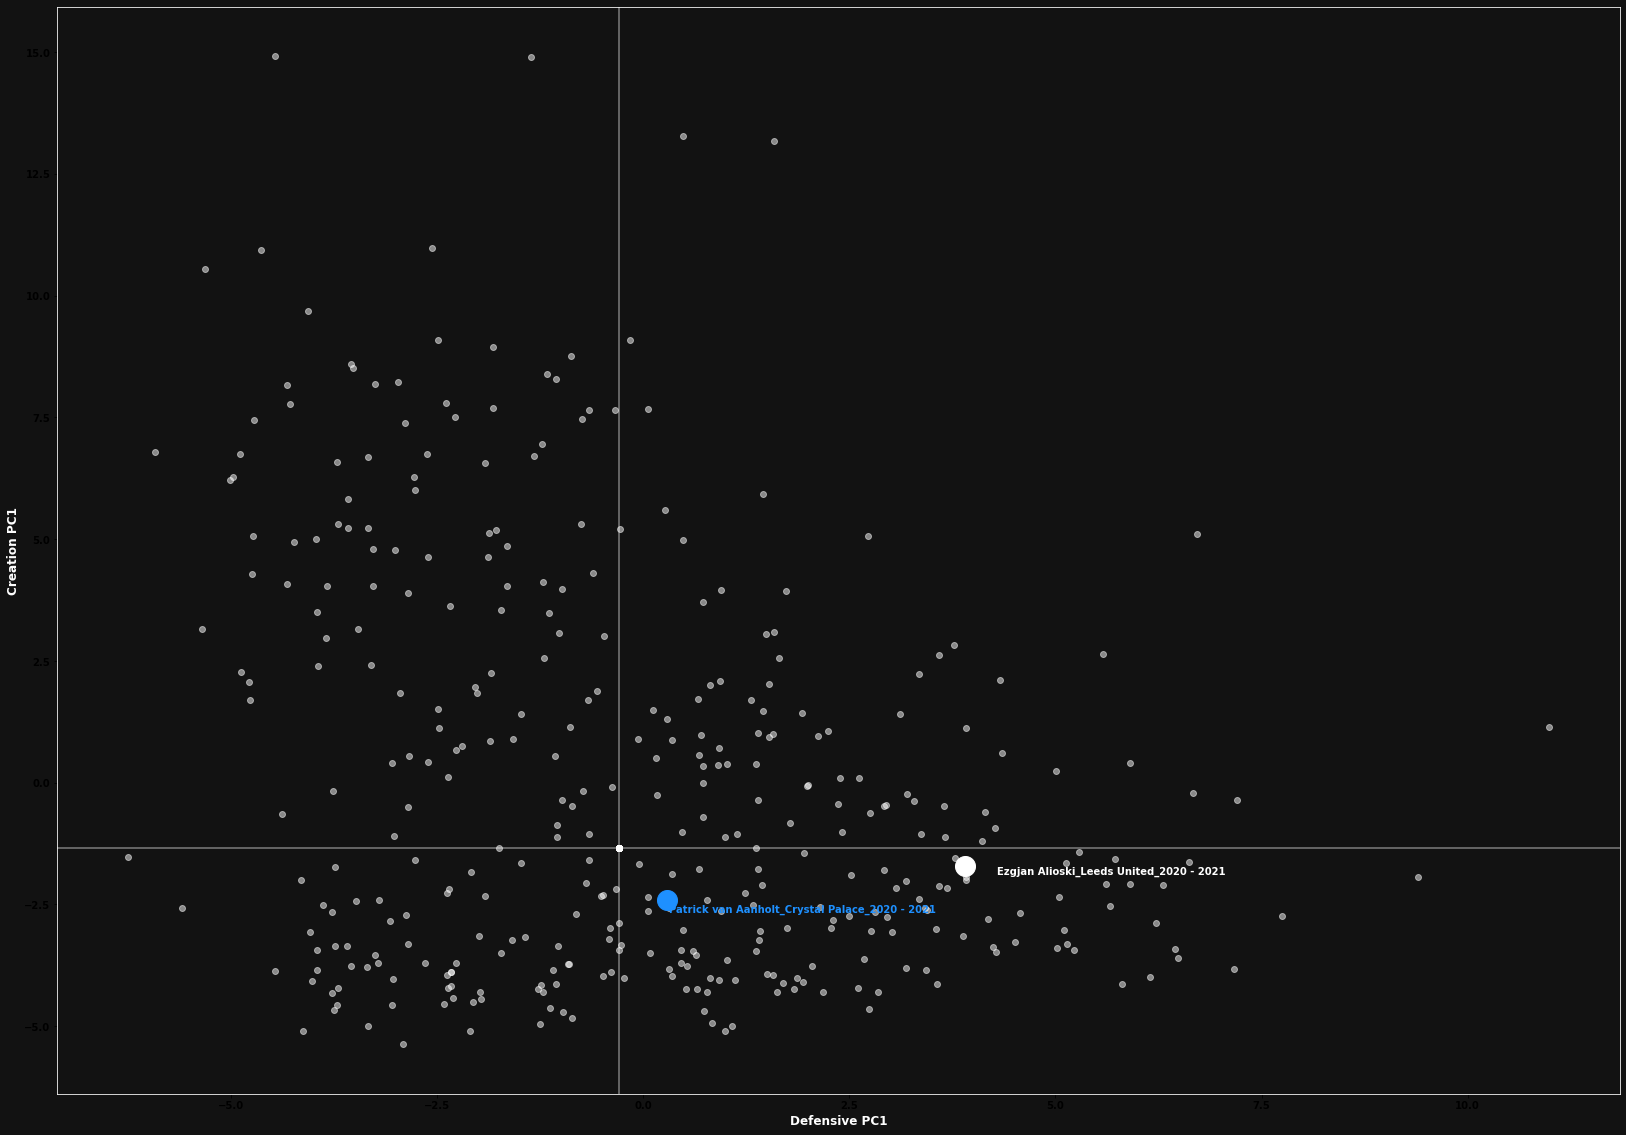

In [47]:
%matplotlib inline
stat1 = 'Defensive PC1'
stat2 = 'Creation PC1'

dfscatter = dfcomp[['Player_ID', stat1, stat2]]

statlist1 = dfscatter[stat1]
statlist1_median = np.percentile(dfcomp[stat1],50)

statlist2 = dfscatter[stat2]
statlist2_median = np.percentile(dfcomp[stat2],50)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# get player values for scatter
for w in range(len(dfscatter['Player_ID'])):
    if dfscatter['Player_ID'][w] == Player_1:
        statlist1_player1 = dfscatter.iloc[w].values.tolist()

for w in range(len(dfscatter['Player_ID'])):
    if dfscatter['Player_ID'][w] == Player_2:
        statlist2_player2 = dfscatter.iloc[w].values.tolist()
# -------------------------------------------------------------------------------------------------------------------------------------------------------------
scatter, axes = plt.subplots(figsize=(28,20))

spines = ['top','bottom','left','right']
for sp in spines:
    if sp in spines:
        axes.spines[sp].set_color('white')

plt.xlabel(stat1, color='white', size = 12, fontweight = 'bold')
plt.ylabel(stat2, color='white', size = 12, fontweight = 'bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

axes.axvline(x = statlist1_median, linewidth=1.5, color = '#7F7F7F', zorder=1)
axes.axhline(y = statlist2_median, linewidth=1.5, color = '#7F7F7F', zorder=1)

plt.scatter(x= statlist1_player1[1],y=statlist1_player1[2],s=400,c=Color_1,zorder=3)
plt.text(s= Player_1, x= 1.1*statlist1_player1[1],y=1.1*statlist1_player1[2],size=10, fontweight = 'bold', c=Color_1,zorder=3)
plt.scatter(x= statlist2_player2[1],y=statlist2_player2[2],s=400,c=Color_2,zorder=3)
plt.text(s= Player_2, x= 1.1*statlist2_player2[1],y=1.1*statlist2_player2[2],size=10, fontweight = 'bold', c=Color_2,zorder=3)

scatter.set_facecolor('#121212')
axes.set_facecolor('#121212')

plt.scatter(statlist1, statlist2, color = 'white', alpha = 0.5, zorder=2)


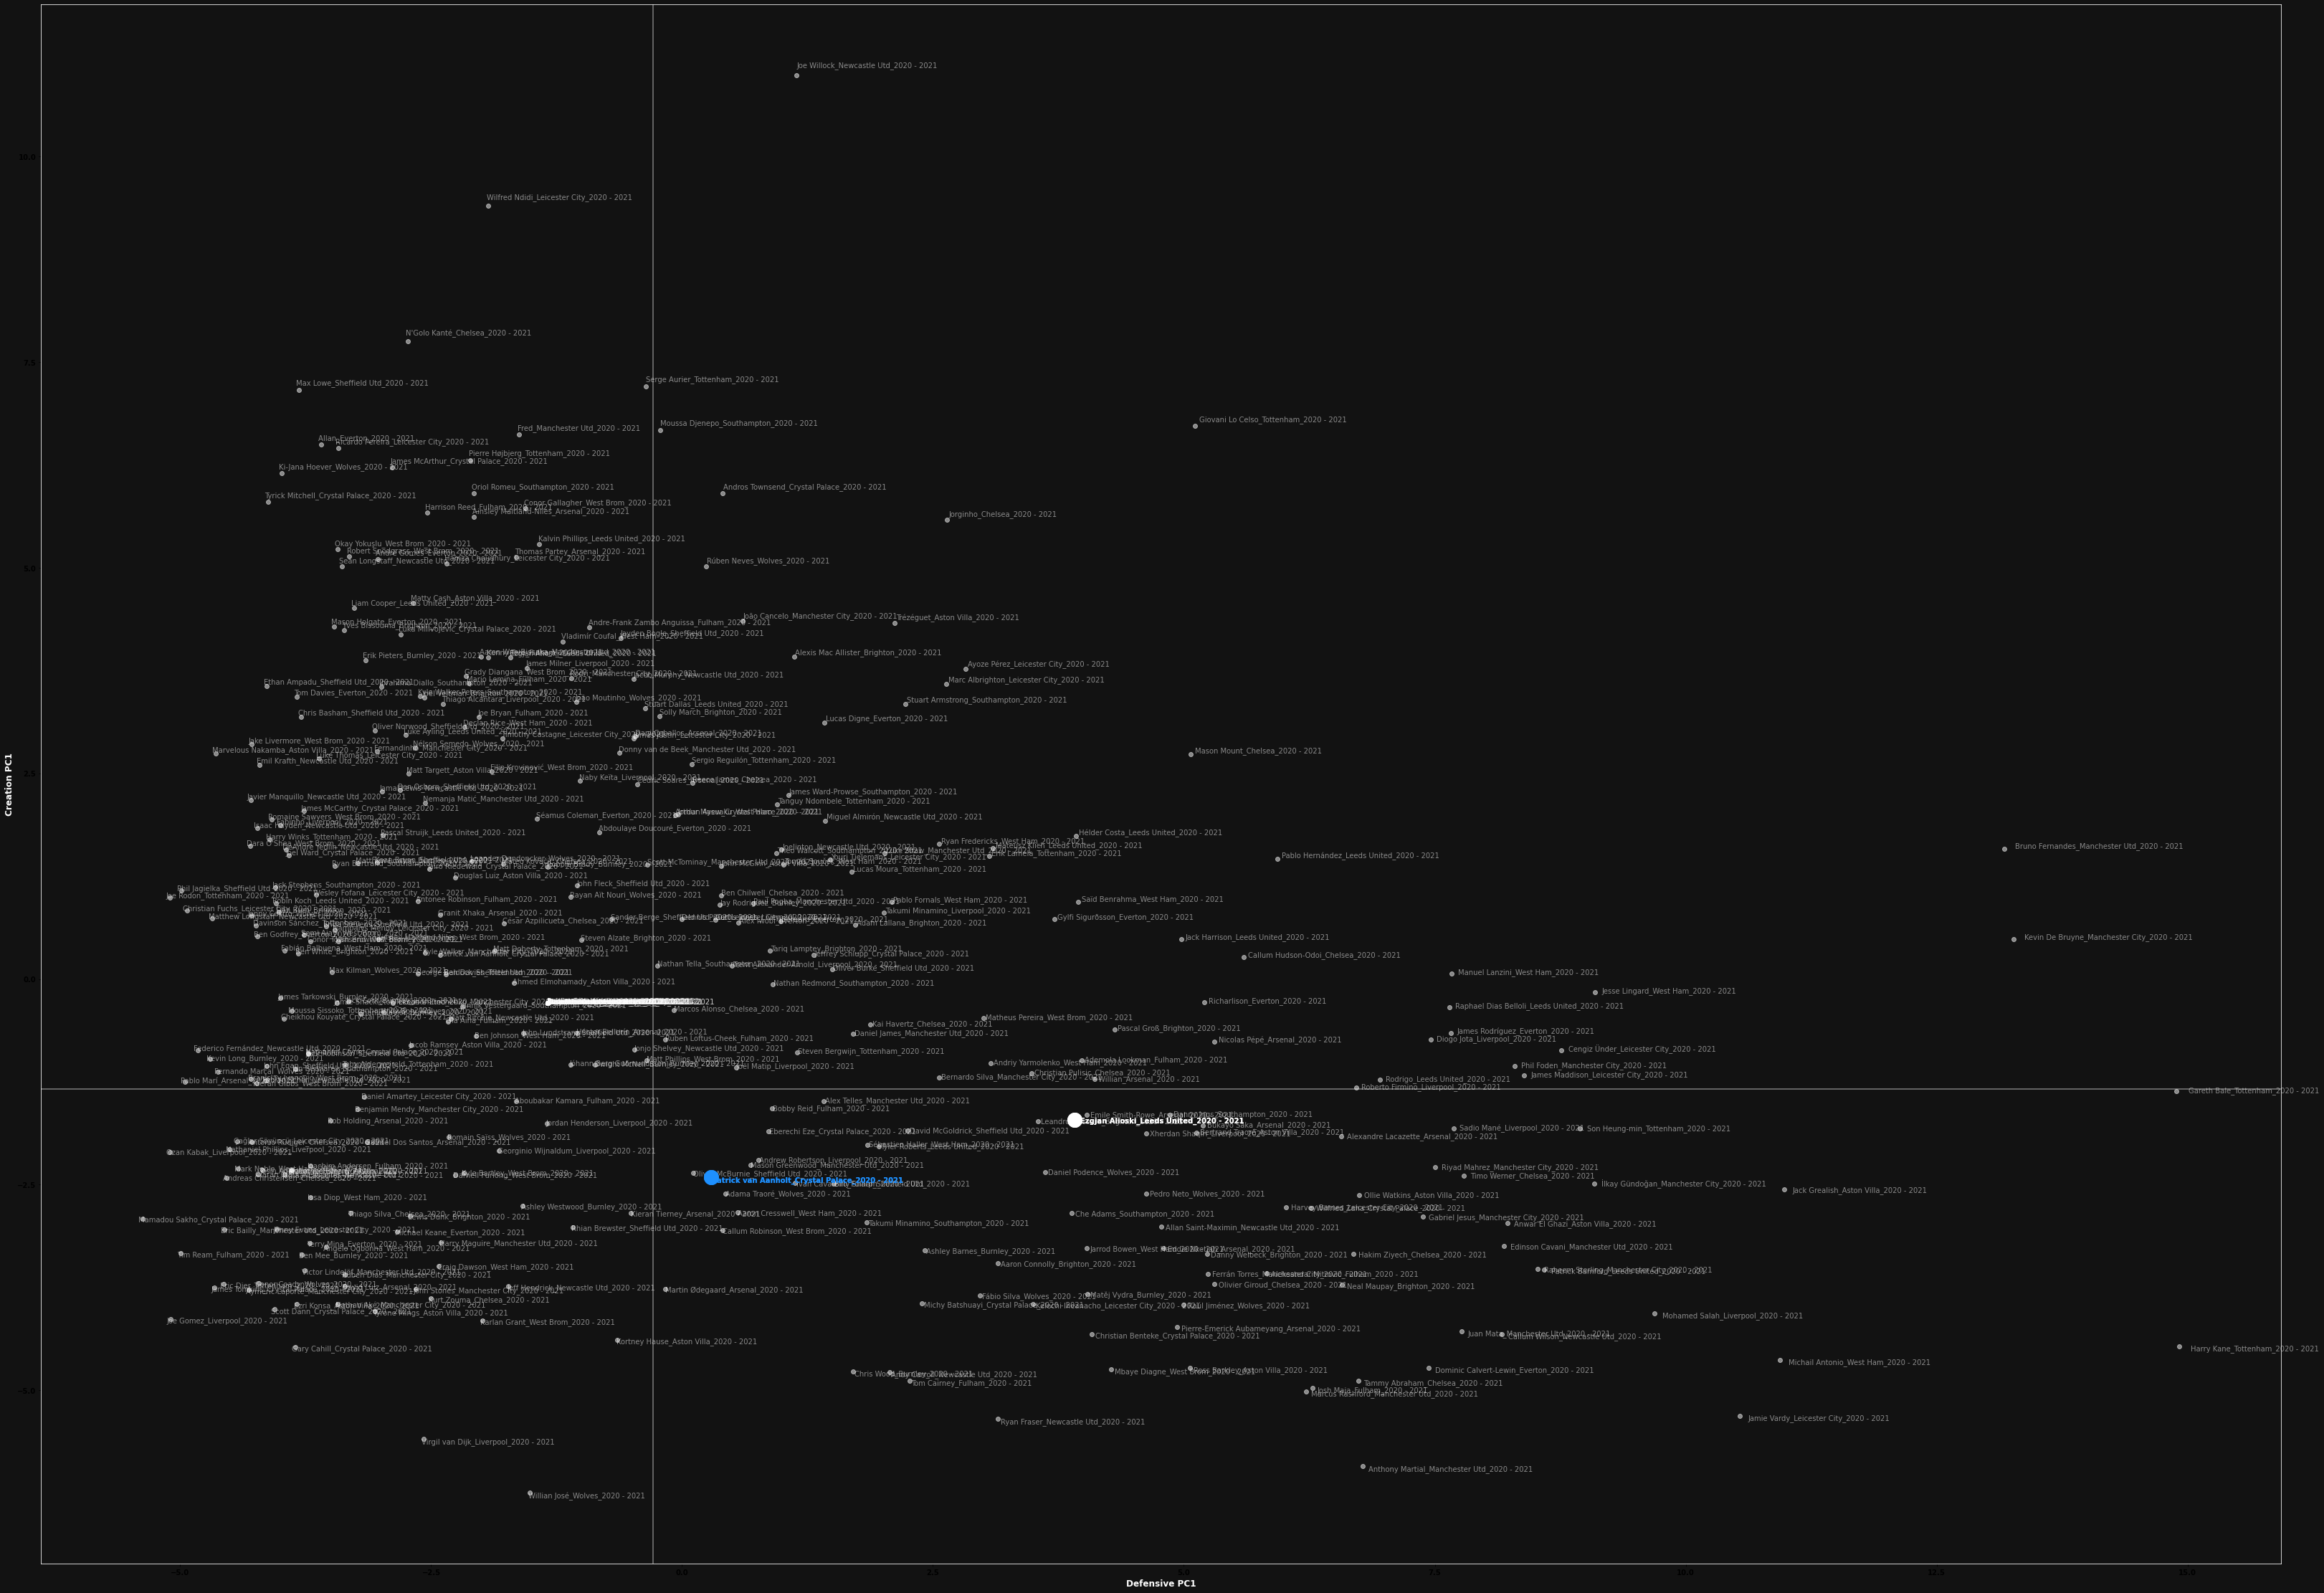

In [48]:
scatter, axes = plt.subplots(figsize=(56, 40))

spines = ['top', 'bottom', 'left', 'right']
for sp in spines:
    if sp in spines:
        axes.spines[sp].set_color('white')

plt.xlabel(stat1, color='white', size=12, fontweight='bold')
plt.ylabel(stat2, color='white', size=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

axes.axvline(x=statlist1_median, linewidth=1.5, color='#7F7F7F', zorder=1)
axes.axhline(y=statlist2_median, linewidth=1.5, color='#7F7F7F', zorder=1)

plt.scatter(x=statlist1_player1[1],
            y=statlist1_player1[2], s=400, c=Color_1, zorder=3)
plt.text(s=Player_1, x=1.015*statlist1_player1[1], y=1.025 *
         statlist1_player1[2], size=10, fontweight='bold', c=Color_1, zorder=3)
plt.scatter(x=statlist2_player2[1],
            y=statlist2_player2[2], s=400, c=Color_2, zorder=3)
plt.text(s=Player_2, x=1.015*statlist2_player2[1], y=1.025 *
         statlist2_player2[2], size=10, fontweight='bold', c=Color_2, zorder=3)

scatter.set_facecolor('#121212')
axes.set_facecolor('#121212')

plt.scatter(x=statlist1_player1[1],
            y=statlist1_player1[2], s=400, c=Color_1, zorder=3)
plt.text(s=Player_1, x=1.015*statlist1_player1[1], y=1.025 *
         statlist1_player1[2], size=10, fontweight='bold', c=Color_1, zorder=3)
plt.scatter(x=statlist2_player2[1],
            y=statlist2_player2[2], s=400, c=Color_2, zorder=3)
plt.text(s=Player_2, x=1.015*statlist2_player2[1], y=1.025 *
         statlist2_player2[2], size=10, fontweight='bold', c=Color_2, zorder=3)

y = dfscatter[stat1]
z = dfscatter[stat2]
n = dfscatter['Player_ID']

plt.scatter(z, y, color='white', alpha=0.5, zorder=2)

for i, txt in enumerate(n):
    plt.annotate(txt, xy=(z[i], y[i]), xycoords='data', xytext=(
        1.1*z[i], 1.1*y[i]), textcoords='offset points', color='white', alpha=0.5, zorder=2)


In [49]:
params = list(dfcomp.columns[1:])
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(dfcomp[params][x])
    a = a - abs(a*.25)

    b = max(dfcomp[params][x])
    b = b + abs(b*.10)

    ranges.append((a, b))

for x in range(len(df['Player_ID'])):
    if df['Player_ID'][x] == Player_1:
        a_values = dfcomp.iloc[x].values.tolist()
    if df['Player_ID'][x] == Player_2:
        b_values = dfcomp.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]


NameError: name 'params' is not defined

In [ ]:
title = dict(
    title_name=str(Player_1).split('_')[0],
    title_color=Color_1,
    subtitle_name=str(Player_1).split(
        '_')[1] + ' ' + str(Player_1).split('_')[2],
    subtitle_color=Color_1,
    title_name_2=str(Player_2).split('_')[0],
    title_color_2=Color_2,
    subtitle_name_2=str(Player_2).split(
        '_')[1] + ' ' + str(Player_2).split('_')[2],
    subtitle_color_2=Color_2,
    title_fontsize=18,
    subtitle_fontsize=15
)

endnote = '@msuatgunerli - all stats per90, data via FBref'


In [ ]:
radar = Radar(background_color="#121212", patch_color="#292929",
              label_color="#FFFFFF", range_color="#FFFFFF")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                           radar_color=[Color_1, Color_2],
                           alphas=[0.7, 0.6], title=title, endnote=endnote,
                           compare=True)
